# SIFT - Harris
### SIFT - Harris


maximum_filter:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
gaussian_filter:https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.gaussian_filter.html
sobel:https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html

matplotlib.patches: https://matplotlib.org/api/patches_api.html

np.where: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.where.html
np.argwhere: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argwhere.html

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

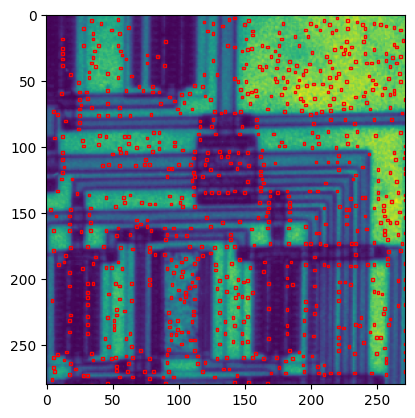

In [12]:
from skimage.filters import gaussian
from scipy.ndimage import maximum_filter,gaussian_filter,sobel
import matplotlib.patches as patches
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

eps=1e-6
img = io.imread('circuit.tif').astype(np.float64)

# TODO perform gaussian_filter, this will make the image less noisy not a step in the Harris algorithm
img_smooth = gaussian_filter(img, sigma=1.5)



# TODO perform sobel to get x-change and y-change
Ix = sobel(img_smooth, axis=1)  # x-change (horizontal gradient)
Iy = sobel(img_smooth, axis=0)  # y-change (vertical gradient)
Ix2 = Ix*Ix
Iy2 = Iy*Iy
Ixy = Ix*Iy

# In the following 3 TODOs, we are using a guassian as our window function. 
# We could have just used an averaging filter.
# TODO perform gaussian_filter on x-change * x-change to get sum of Ixx (i.e Sx2)
# TODO perform gaussian_filter on x-change * y-change to get sum of Ixy (i.e Sxy)
# TODO perform gaussian_filter on y-change * y-change to get sum of Iyy (i.e Sy2)
Sx2 = gaussian_filter(Ix2, sigma=1.5)
Sxy = gaussian_filter(Ixy, sigma=1.5)
Sy2 = gaussian_filter(Iy2, sigma=1.5)


# TODO Get R value using the supplied equations (use **2 for power 2)
detM = Sx2 * Sy2 - Sxy**2
traceM = Sx2 + Sy2
R = detM / (traceM + eps)


# TODO Get the R values which are local maximum and above a given threshold. 
# The maximum_filter will help you get the max value in a neighborhood.
R_max = maximum_filter(R, size=3)
R_max_global = R.max()
z = (R == R_max) & (R > 0.01 * R_max_global)

# From here we will assume that z is a binary mask where 1 means there is a corner
# This part will get the indices of z where z = true, then we will draw a small rectangle around those indices
indx = np.argwhere(z==True)

fig,ax = plt.subplots(1)
ax.imshow(img)

for ind in indx:
    rect = patches.Rectangle((ind[1],ind[0]),2,2,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()


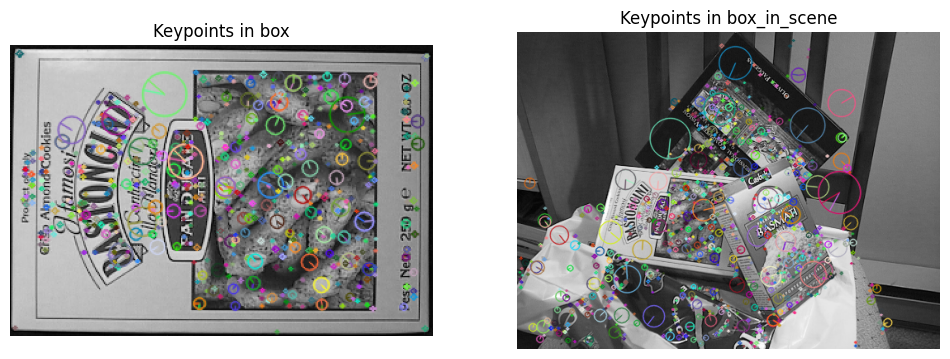

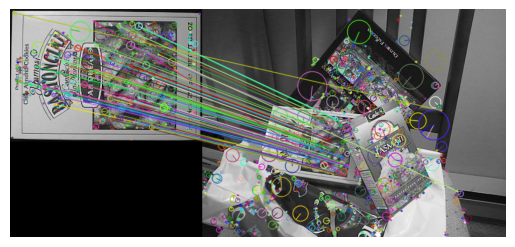

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


sift = cv2.xfeatures2d.SIFT_create()

## TODO: read image box.png and box_in_scene
box = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)          # queryImage
box_in_scene = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE) # trainImage

## TODO: find the keypoints and descriptors with SIFT
# Use sift.detectAndCompute
kp1, des1 = sift.detectAndCompute(box, None)
kp2, des2 = sift.detectAndCompute(box_in_scene, None)

#Draw keypoints of img1 using cv2.drawKeypoints
img1_kp = cv2.drawKeypoints(box, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(box_in_scene, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show results using matplotlib (correct color!)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Keypoints in box")
plt.imshow(img1_kp, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Keypoints in box_in_scene")
plt.imshow(img2_kp, cmap='gray')
plt.axis('off')

plt.show()

## TODO: Construct BFMatcher, Hint use cv2.BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

## Use knnMatch with k = 2 to get the matches between the descriptors 
matches = bf.knnMatch(des1, des2, k=2)

## TODO: Apply ratio test to remove ambigiuous matched (points that has multiple matches)
## Hint: use the distance in match 
## For k=2 knnMatch return the 2 closest matches anyways.
## if the distance between the keypoints and its 2 neighbours is close, then the keypoint is ambigious and 
## you should neglect it
good_matches = []
ratio = 0.75
for m, n in matches:
    if m.distance < ratio * n.distance:
        good_matches.append(m)


## TODO: Draw the matches features use cv2.drawMatchesKnn with flags =4 
good_matches_knn = [[m] for m in good_matches]

img3 = cv2.drawMatchesKnn(
    box, kp1,
    box_in_scene, kp2,
    good_matches_knn,
    None,
    flags=4
)

plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.imshow(img3)
plt.axis('off')
plt.show()

In [ ]:
"b. What does the result of the function means?"
"""
Keypoints 
Each keypoint is a distinctive point in the image (a blob)
Every keypoint typically stores:

- its (x, y) 
- its scale (sigma)
- its orientation (theta)
- its gradient magnitude at that point

Descriptors 
For each keypoint, SIFT builds a 128-dimensional descriptor vector that describes the local texture around that point (gradient magnitudes and directions).
These descriptors:

are robust to scale and rotation
are used to match points between images (e.g., box vs box_in_scene)
"""


"d. What does the result image displayed means?"
"""
When we call something like showkeys (or in OpenCV drawKeypoints), it overlays the detected keypoints on the image.
Typically, we see:

Circles at positions of keypoints → where SIFT found stable, distinctive features.
The size of each circle → the scale of the keypoint (larger = feature detected at a coarser/zoomed-out scale).

the line inside the circle → the orientation of the keypoint (dominant gradient direction).


So the displayed image is a visualization of:

-Where SIFT thinks the important points are
-At what scale they were detected
-With what orientation the local pattern is aligned
"""


SyntaxError: invalid syntax (1787625739.py, line 3)